# Performing EDA on White wine data and Predicting the Quality of White wine by using different ML Model
# Obtaining the best model

In [ ]:
# Importing neccessary liraries which will require throught the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
file_path='https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-white.csv'
white_wine_df=pd.read_csv(file_path,sep=';')

In [ ]:
# Head function gives the initial look of dataset. I helps to undestand data
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Cheaking the shape of dataset
white_wine_df.shape

(4898, 12)

In [ ]:
# Cheaking wheather the dataset contain any null value
white_wine_df.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Finding the total number of null values in each column
white_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Cheaking the data type of each column present in the dataset
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Describe function gives the statistical relation between the values present in  each column
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Observation**

*   Mean value is nearly same as median value for most of the columns except residual sugar, free sulfur dioxide,total sulfur dioxide. Mean is slightly less for quality.
*   There is large differenc between 75% tile and maximum value for alomst all columns except density, pH, alcohol and quality. Which shows the presence of outliers in dataset



In [ ]:
white_wine_df.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
                               'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide',}).head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
# Cheaking the duplicate values
duplicates=white_wine_df[white_wine_df.duplicated()]
duplicates.shape

(937, 12)



*   In this problem statement our target variable if quality, Since we have to find out the quality of white wine
*   All other columns act as input variable as quality of white wine is depend on this parameters



In [ ]:
white_wine_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
white_wine_df['quality'].nunique()

7

In [ ]:
# Frequency of quality values
white_wine_df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

**Data visualization or Graphical Representation**

In [ ]:
# X1 is a input variable and y1 is a target variable
X1=white_wine_df.drop(white_wine_df['quality'])
y1=white_wine_df['quality']

**Plotting the histogram of attributes of data**

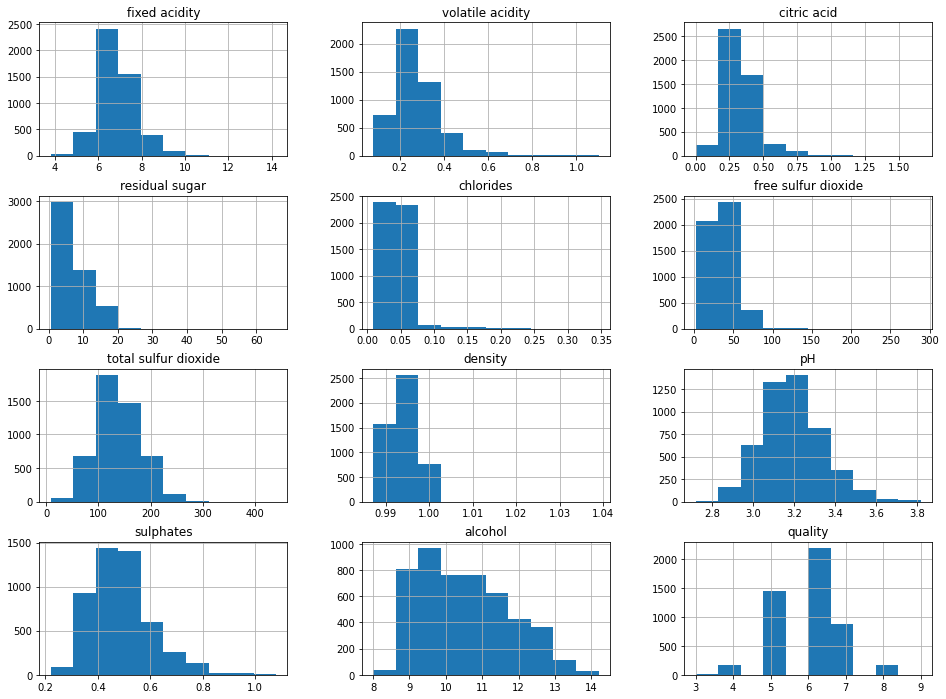

In [ ]:
white_wine_df.hist(figsize=(16,12))
plt.show()


**Observations**
*   It shows that curve of pH is normally ditriduted.
*   The curve of alcohal is shifted towards left
*   Most of the values of quality are between 5 to 7






<Figure size 1728x1440 with 0 Axes>

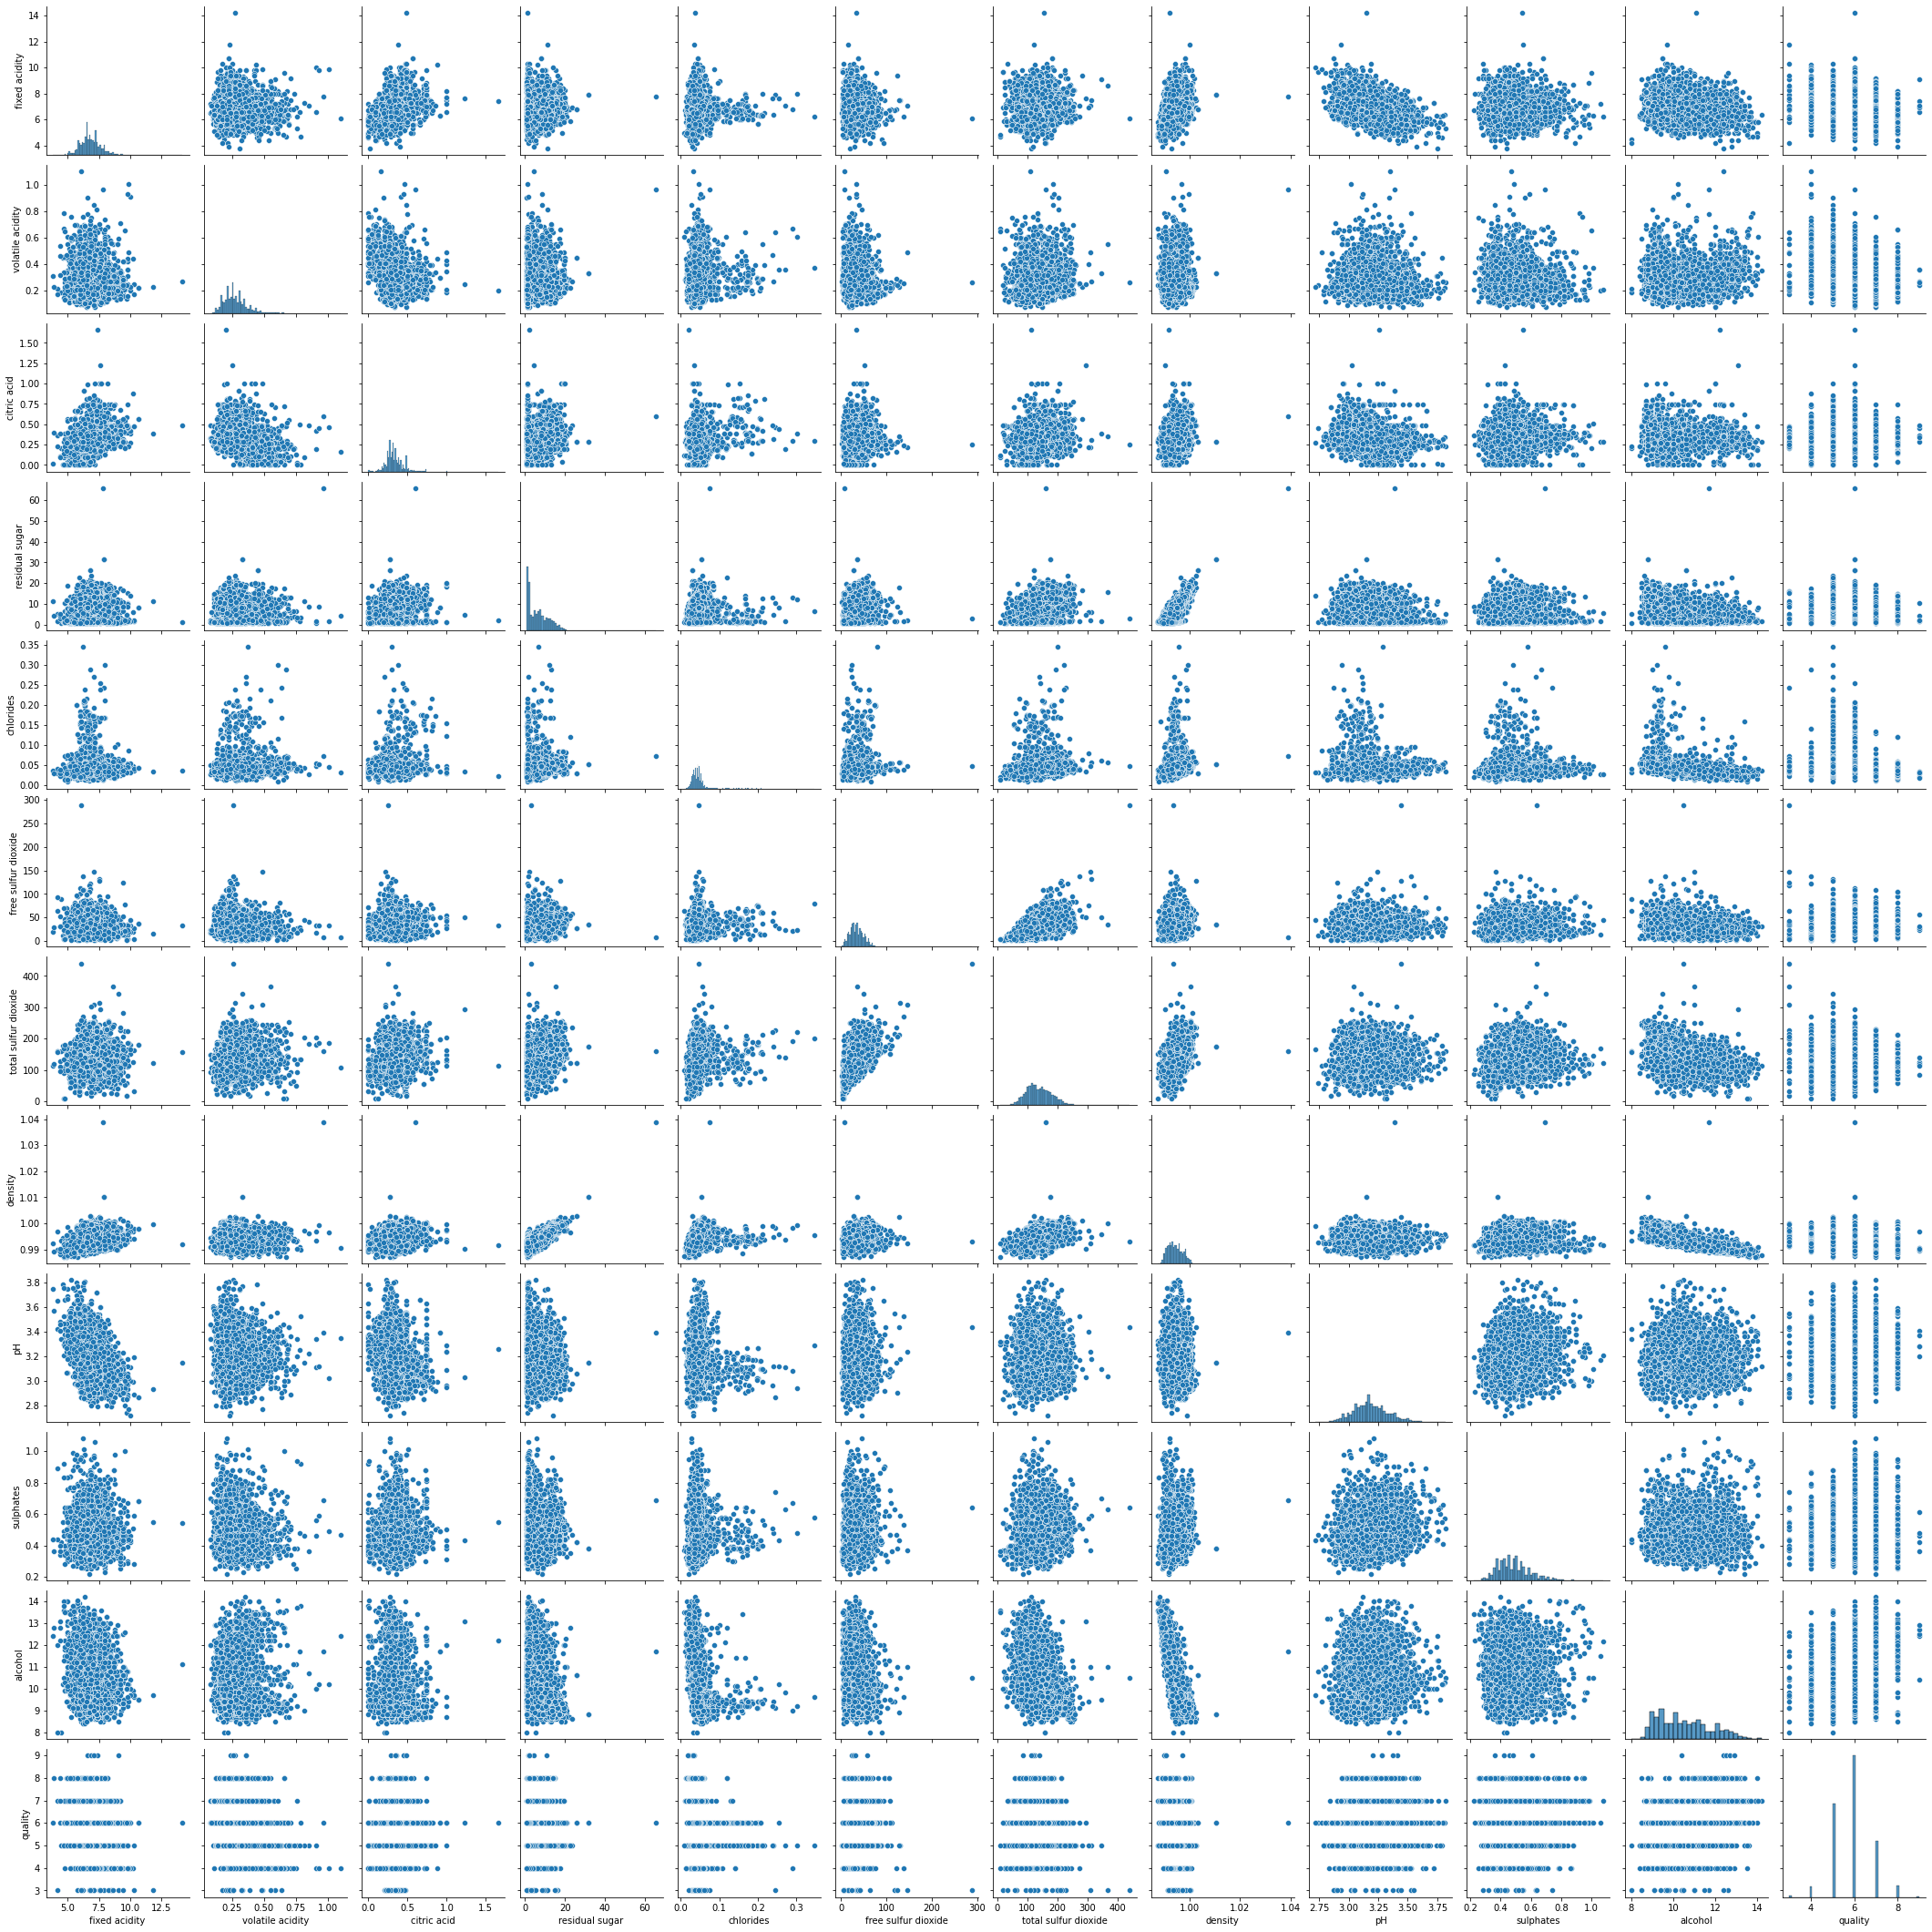

In [ ]:
plt.figure(figsize=(24,20))
sns.pairplot(white_wine_df)

**Observation**

*   Positive linear corelation between density and sugar




In [ ]:
# Corr() function is use to find out the relation between different of dataset
white_wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


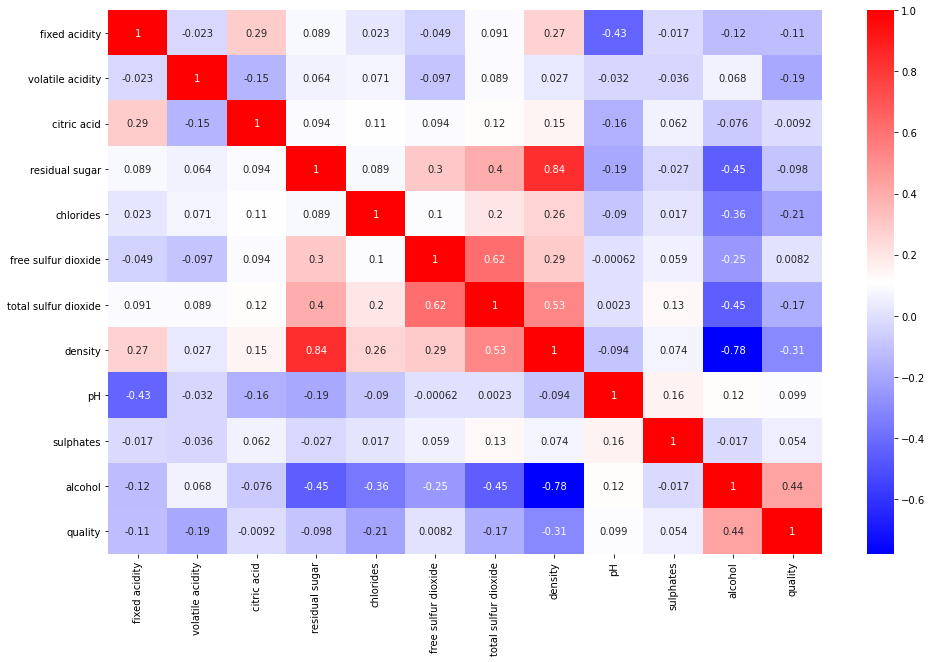

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(white_wine_df.corr(),cmap='bwr',annot=True)

**Observation**

*   Corr() and heat map gives the relation between different parametrs of dataset 
*   There is a strong positive relation between 'density' and 'residual sugar'.
*   There is a strong negative relation between 'density' and 'alcohol'.






**Defining  the grade of white wine**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


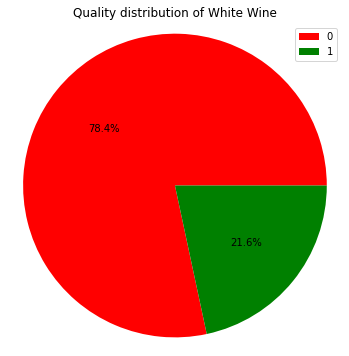

In [ ]:
#good wine
white_wine_df['grade']=1

#Bad wine
white_wine_df.grade[white_wine_df['quality']<6.5]=0

plt.figure(figsize=(6,6))
colors=['red','green']
labels=white_wine_df.grade.value_counts().index
plt.pie(white_wine_df.grade.value_counts(),colors=colors,autopct='%1.1f%%')
plt.legend(labels)
plt.axis('equal')
plt.title('Quality distribution of White Wine')
plt.show()




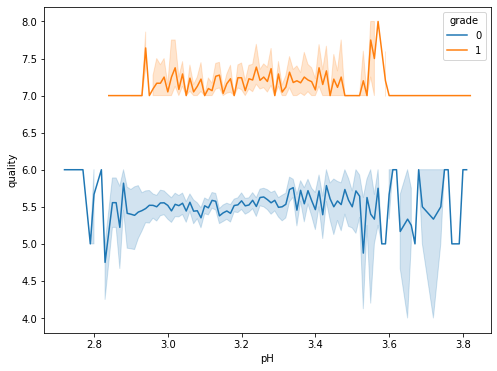

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.lineplot(x='pH',y='quality',hue='grade',data=white_wine_df,markers=True)

**Predicting the quality of white wine using**
*  1 Random Forest Classifier
* 2 Gaussian Naive Bayes Classifier
*   3 Decision Tree Classifier
*  4 KNeighbors Classifier
*  5 SVM Classifier

In [ ]:
white_wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'grade'],
      dtype='object')

In [ ]:
# Defining X and y
X=white_wine_df.drop(['quality'],axis=1)
y=white_wine_df['quality']

In [ ]:
# Training the model and dividing data into training and test set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((3918, 12), (980, 12), (3918,), (980,))

In [ ]:
# 1] Random Foresr Classifier

# Loading the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs=2, random_state=0)
# Fitting the model
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the response for test data
y_pred= clf.predict(X_test)
accuracy_clf=round(clf.score(X_test,y_test)*100,2)
print(accuracy_clf)
# Finding the accuracy of model by using accuracy_score
from sklearn.metrics import accuracy_score
print("Random Forest Classifier accuracy:",accuracy_score(y_test,y_pred),'%')



79.39
Random Forest Classifier accuracy: 0.7938775510204081 %


In [ ]:
# Gaussian Naive Bayes Classifier

 #loading the Gaussian Naive Bayes Calssifier
from sklearn.naive_bayes import GaussianNB
#creating Gaussian Classifier
gnb=GaussianNB()

#Fitting the model
gnb.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the response
y_pred=gnb.predict(X_test)
accuracy_gnb=round(gnb.score(X_test,y_test)*100,2)
print(accuracy_gnb)
# Finding the accuracy of model by using accuracy_score
from sklearn.metrics import accuracy_score
print('Gaussian Naive Bayes Accuracy:',accuracy_score(y_test,y_pred)*100,'%')

66.43
Gaussian Naive Bayes Accuracy: 66.42857142857143 %


In [ ]:
# Decision Tree Classifier

# Loading the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=10)

#fitting the model
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predicting the response
y_pred=dtc.predict(X_test)
accuracy_dtc=round(dtc.score(X_test,y_test)*100,2)
print(accuracy_dtc)
# Finding the accuracy of model by using accuracy_score
from sklearn.metrics import accuracy_score
print('Decision Tree Classifier Accuracy:',accuracy_score(y_test,y_pred)*100,'%')

69.39
Decision Tree Classifier Accuracy: 69.38775510204081 %


In [ ]:
# K Nearest neighbor 

# Loading the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)

#fitting the model
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Predicting the response
y_pred=knc.predict(X_test)
accuracy_knc=round(knc.score(X_test,y_test)*100,2)
print(accuracy_knc)
# Finding the accuracy of model by using accuracy_score
from sklearn.metrics import accuracy_score
print('KNN Classifier Accuracy:',accuracy_score(y_test,y_pred)*100,'%')

50.71
KNN Classifier Accuracy: 50.71428571428571 %


In [ ]:
# SVM Classifier

# Loading the SVM Classifier
from sklearn.svm import SVC
svc=SVC(C=1, kernel='rbf')

# fitting the model
svc.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting the response
y_pred=svc.predict(X_test)
accuracy_svc=round(svc.score(X_test,y_test)*100,2)
print(accuracy_svc)
# Finding the accuracy of model by using accuracy_score
from sklearn.metrics import accuracy_score
print('SVM Classifier Accuracy:',accuracy_score(y_test,y_pred)*100,'%')

44.29
SVM Classifier Accuracy: 44.285714285714285 %


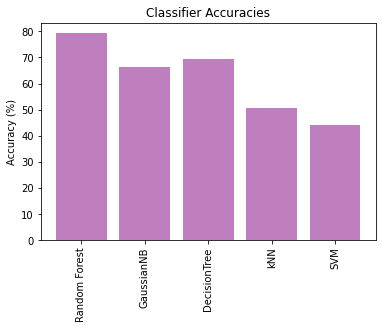

In [ ]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [accuracy_clf, accuracy_gnb, accuracy_dtc,accuracy_knc,accuracy_svc]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [ ]:
print('Accuracy of Random Forest Classifier:',accuracy_clf,'%')
print('Accuracy of Decision Tree Classifier:',accuracy_dtc,'%')
print('Accuracy of Naive Bayes Classifier:',accuracy_gnb,'%')

Accuracy of Random Forest Classifier: 79.39 %
Accuracy of Decision Tree Classifier: 69.39 %
Accuracy of Naive Bayes Classifier: 66.43 %


In [ ]:
print('Random Tree Forest is best suited for this problem')

Random Tree Forest is best suited for this problem
